In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [40]:
data = pd.read_csv('ts.C1.variables.csv')
data_np = data.values

data_np[:,-1]

array([303.68613, 303.68613, 303.68613, ..., nan, nan, nan], dtype=object)

In [41]:
data1 = data[:541]

In [42]:
data1

time  total  direct  diffuse  cloud fraction  \
0    2004-01-01 08:00:00    5.2     0.0      5.2             NaN   
1    2004-01-01 08:01:00    5.7     0.0      5.7             NaN   
2    2004-01-01 08:02:00    6.1    -0.0      6.1             NaN   
3    2004-01-01 08:03:00    6.3    -0.0      6.3             NaN   
4    2004-01-01 08:04:00    6.3    -0.0      6.3             NaN   
..                   ...    ...     ...      ...             ...   
536  2004-01-01 16:56:00   46.1    20.8     25.3             NaN   
537  2004-01-01 16:57:00   43.5    19.4     24.1             NaN   
538  2004-01-01 16:58:00   41.0    18.0     23.0             NaN   
539  2004-01-01 16:59:00   38.6    16.6     22.0             NaN   
540  2004-01-01 17:00:00   36.2    15.2     21.0             NaN   

     brightness temp  cloud_transmissivity  wind speed  wind direction  \
0             278.42                   NaN        8.29           198.5   
1             278.19                   NaN       10.05           198.2   
2             278.35                   NaN        9.34           200.0   
3             278.63                   NaN        8.19           200.4   
4             278.92                   NaN        9.27           200.6   
..               ...                   ...         ...             ...   
536           270.58                   NaN        4.58           208.0   
537           270.54                   NaN        4.97           204.8   
538           270.51                   NaN        4.11           201.8   
539           270.40                   NaN        4.49           200.9   
540           270.39                   NaN        4.77           198.5   

       temp  relative humidity  vapor pressure  pressure  surface albedo  \
0    285.92               89.7           13.30     97.88        0.181729   
1    285.91               90.0           13.34     97.89        0.170083   
2    285.96               89.9           13.37     97.88        0.166357   
3    285.97               89.7           13.34     97.88        0.158058   
4    285.94               90.1           13.38     97.87        0.153953   
..      ...                ...             ...       ...             ...   
536  290.70               70.4           14.26     97.61        0.236706   
537  290.70               70.5           14.28     97.60        0.234950   
538  290.64               70.5           14.22     97.60        0.236787   
539  290.57               70.7           14.20     97.60        0.237616   
540  290.47               71.2           14.21     97.59        0.230119   

     aerosol angstrom   aod_500  ozone concentration  
0            0.716270  0.106648            303.68613  
1            0.716270  0.106648            303.68613  
2            0.716270  0.106648            303.68613  
3            0.716270  0.106648            303.68613  
4            0.716270  0.106648            303.68613  
..                ...       ...                  ...  
536          0.713077  0.094153            303.68613  
537          0.713077  0.094153            303.68613  
538          0.713077  0.094153            303.68613  
539          0.713077  0.094153            303.68613  
540          0.713077  0.094153            303.68613  

[541 rows x 17 columns]

In [43]:
data1 = data1.drop(['time', 'ozone concentration', 'aerosol angstrom'], axis=1)

In [44]:
data1_noNan = data1.dropna(axis = 0)

In [45]:
data1_noNan
data1_noNan_np = data1_noNan.values

In [46]:
data1_noNan_np.shape

(411, 14)

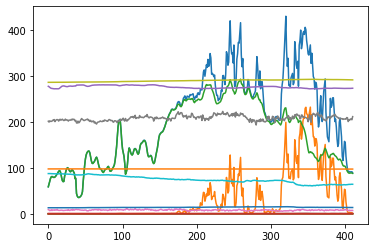

In [47]:
plt.plot(data1_noNan_np)

In [48]:
Mean = np.mean(data1_noNan_np, axis = 0)
Std = np.std(data1_noNan_np, axis = 0)

Mean

array([2.07166667e+02, 3.45540146e+01, 1.72617275e+02, 9.45352798e-01,
       2.76200097e+02, 5.06861314e-01, 8.31914842e+00, 2.08347689e+02,
       2.89974623e+02, 7.49093187e+01, 1.43956691e+01, 9.77930414e+01,
       2.07942710e-01, 9.48939258e-02])

In [49]:
data1_noNan_np = (data1_noNan_np - Mean) / Std

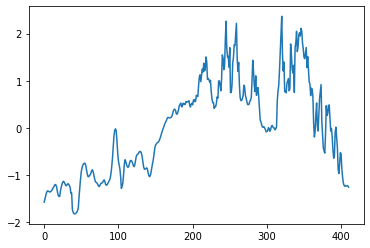

In [50]:
plt.plot(data1_noNan_np[:,0])

In [51]:
data1_np = data1.values

In [52]:
data1_np

array([[ 5.2000000e+00,  0.0000000e+00,  5.2000000e+00, ...,
         9.7880000e+01,  1.8172894e-01,  1.0664784e-01],
       [ 5.7000000e+00,  0.0000000e+00,  5.7000000e+00, ...,
         9.7890000e+01,  1.7008317e-01,  1.0664784e-01],
       [ 6.1000000e+00, -0.0000000e+00,  6.1000000e+00, ...,
         9.7880000e+01,  1.6635671e-01,  1.0664784e-01],
       ...,
       [ 4.1000000e+01,  1.8000000e+01,  2.3000000e+01, ...,
         9.7600000e+01,  2.3678692e-01,  9.4153150e-02],
       [ 3.8600000e+01,  1.6600000e+01,  2.2000000e+01, ...,
         9.7600000e+01,  2.3761556e-01,  9.4153150e-02],
       [ 3.6200000e+01,  1.5200000e+01,  2.1000000e+01, ...,
         9.7590000e+01,  2.3011930e-01,  9.4153150e-02]])

In [53]:
T, m = data1_np.shape

In [54]:
T

541

In [60]:
time_lag = 50

In [67]:
X = []
Y = []
for i in range(time_lag-1, T-1):
    begin = i - (time_lag-1)
    end = i+1
    
    x = data1_np[begin:end,:]
    y = data1_np[end,:]

    
    if (not np.isnan(x).any()) and (not np.isnan(y).any()):
        x  = (x - Mean)/Std
        y  = (y - Mean)/Std
    
    
        X.append(x)
        Y.append(y)

In [68]:
len(X)

257

In [69]:
X_np = np.array(X)
Y_np = np.array(Y)

In [70]:
X_np.shape


(257, 50, 14)

In [71]:
Y_np.shape

(257, 14)

In [72]:
sio.savemat('data_np', {'X_np':X_np, 'Y_np': Y_np})

In [73]:
sio.savemat('data_nNan_np', {'data':data1_noNan_np})